# Исследование данных о российском кинопрокате



Заказчик этого исследования — Министерство культуры Российской Федерации.

Нам нужно изучить рынок российского кинопроката и выявить текущие тренды. Уделить внимание фильмам, которые получили государственную поддержку. Попробовать ответить на вопрос, насколько такие фильмы интересны зрителю.

Мы будете работать с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

## Откроем файлы с данными и объединим их в один датафрейм. 

Объединим данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [2]:
# импортируем библиотеки pandas, matplotlib и seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# откроем датасет c данными о прокатных удостоверениях либо с локально, либо из интернета
try:
    mkrf_movies = pd.read_csv('./datasets/mkrf_movies.csv')
except:
    mkrf_movies = pd.read_csv('https://code.s3.yandex.net/datasets/mkrf_movies.csv')

In [4]:
# проверим информацию датасета
mkrf_movies.info()
mkrf_movies.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [5]:
# откроем датасет с данными о прокате в российских кинотеатрах либо с локально, либо из интернета
try:
    mkrf_shows = pd.read_csv('./datasets/mkrf_shows.csv')
except:
    mkrf_shows = pd.read_csv('https://code.s3.yandex.net/datasets/mkrf_shows.csv')

In [6]:
# проверим информацию датасета
mkrf_shows.info()
mkrf_shows.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


В датасетах `mkrf_shows` и `mkrf_movies` имеется столбец `puNumber`, по нему и будем объединять. Но перед объединением необходимо привести тип данных к единому стилю. Так как `puNumber` это девятизначный номер, то тип `int64` вполне оправдан.

In [7]:
#исправим тип данных `mkrf_movies['puNumber']` 
try:
    mkrf_movies['puNumber'] = mkrf_movies['puNumber'].astype('int64', errors='raise')
except:
    mkrf_movies['puNumber'] = mkrf_movies['puNumber'].astype('int64', errors='ignore')
mkrf_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

Не помогло, значит в строке затесалось что-то отличное от цифр. Попробуем решить эру проблему. 

Прибегнем к помощи регулярных выражений. Т.к. `puNumber` состоит из чисел, мы заменим нечисловую строку на пустую. Чтобы не городить строки типа `r'^[a-zA-Z0-9_.+-]+(?:\.[a-zA-Z0-9-]+)`, используем специальную конструкцию `\D+` - она как раз и выберет все кроме цифр.

In [9]:
mkrf_movies['puNumber'] = mkrf_movies['puNumber'].str.replace(r'\D+','',  regex=True)

In [10]:
# уберем строки с пустым значением 
mkrf_movies = mkrf_movies[mkrf_movies['puNumber'] !='']
# проверим сколько строк ушло
mkrf_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   object 
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

Одна срока - не велика потеря! Можно исправлять тип данных и собирать две таблицы воедино.

In [11]:
# исправим тип данных 
mkrf_movies['puNumber'] = mkrf_movies['puNumber'].astype('int64')

Теперь можно приступать с объеденению двух датасетов:

In [12]:
# исправим тип данных 
mkrf_movies['puNumber'] = mkrf_movies['puNumber'].astype('int64')
#собираем датасет
data = mkrf_movies.merge(mkrf_shows, on=['puNumber'], how = 'left')
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


Общий датасет собран. Проверим, не полтерялись ли строки:

In [13]:
print (mkrf_shows['box_office'].count()- data['box_office'].count(), 'строк было потеряно.')

0 строк было потеряно.


Похоже что таблицы объеденились удачно. Проверим на дубликаты и посмотрим сколько пропусков у нас есть.

In [14]:
#проверка на дубликаты
data.duplicated().sum()

0

In [15]:
#смотрим сколько пустых значений получилось
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
title,0.000000
puNumber,0.000000
show_start_date,0.000000
type,0.000000
film_studio,0.000000
production_country,0.000000
director,0.000000
producer,8.000000
age_restriction,0.000000
refundable_support,96.000000


Дубликатов нет, но есть огромное количество пропусков в финансовых столбцах. в остальных столбцах все более-менее прилично. 

Можно приступать к предобработке данных!

<a id="preprocessing"> </a>
## Предобработка данных

### Проверим типы данных

- Проверим типы данных в датафрейме и преобразуем их там, где это необходимо.

In [16]:
# проверим типы данных
data.dtypes

title                     object
puNumber                   int64
show_start_date           object
type                      object
film_studio               object
production_country        object
director                  object
producer                  object
age_restriction           object
refundable_support       float64
nonrefundable_support    float64
budget                   float64
financing_source          object
ratings                   object
genres                    object
box_office               float64
dtype: object

Для дальнейшей  корректной работы тип данных должен соответствовать самим данным. Рассмотрим подробнее столбцы:
1. `show_start_date` - `object`, дата и время - `datetime64`
2. `age_restriction` - `object`, я бы оставил только цифры, без описания каждого возростного рейтинга - `int64`
3. `refundable_support` - `float64`, возвратные средства оставим в рублях - `int64`
4. `nonrefundable_support` - `float64`, невозвратные средства оставим в рублях -  `int64`
5. `budget` - `float64`, бюджет киноленты в рублях - `int64`
6. `box_office` - `float64`, сборы в рублях - `int64`
7. `ratings` - `object`, рейтинг фильма -  `float64`

`title`, `puNumber`, `type`, `film_studio`, `production_country`,`director` ,`producer` ,`financing_source` и `genres` имеют корректный тип данных.

Пойдем по порядку: начнем с колонки `show_start_date`.

In [17]:
# преобразуем дату и время попутно выкинув время, т.к. оно не имеет для нас значения
data['show_start_date'] = data['show_start_date'].astype('datetime64[D]') 

В `age_restriction` откинем лишнее, оставив только цифру разрешенного возраста.

In [18]:
# посмотрим на уникальные значения
data['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

In [19]:
# уберем из колонки все кроме цифр, подправим выходное значение и поменяем тип данных на `int64` 
data['age_restriction'] = data['age_restriction'].str.replace(r'\D+','',regex=True) \
.str.replace('1616','16').str.replace('1212','12').str.replace('66','6').astype(int)

In [20]:
# Код ревьюера

pd.Series('«18+» - запрещено для детей').str.extract('«(\d+)\+»')

,0
0,18


В `refundable_support`, `nonrefundable_support`, `budget` и `box_office` поменяем тип данных циклом.

In [21]:
# преобразуем 'float64' в 'int64' 
columns_list = ['refundable_support', 'nonrefundable_support', 'budget', 'box_office']
for column in columns_list:
    data[column] = np.floor(pd.to_numeric(data[column], errors='coerce')).astype('Int64')

In [22]:
# Код ревьюера

# Код ревьюера

df_demo = pd.DataFrame({'col_1' : [1,2,4,np.nan], 'col_2' : [10,20,40,50]}).astype({'col_1' : 'Int64', 'col_2' : 'int'})

try:
    df_demo[['col_1']].corrwith(df_demo['col_2'])
except Exception as e:
    print(repr(e))
    
df_demo = df_demo.astype({'col_1' : 'float'})

df_demo[['col_1']].corrwith(df_demo['col_2'])

AttributeError("'float' object has no attribute 'shape'")


col_1    1.0
dtype: float64

Проверим, что такого в `ratings`, что сделало из него `object`.

In [23]:
# посмотрим на уникальные значения
data['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

Проценты и nan в рейтинге, будем починить:

In [24]:
# уберем из колонки проценты, подправим выходное значение и поменяем тип данных на `int64` 
data['ratings'] = data['ratings'].replace('\%','',regex=True).astype(np.float64)
data.loc[data['ratings'] > 10, 'ratings'] = data['ratings'] /10

In [25]:
# Код ревьюера

pd.Series(['99%', 2.4]).astype('str').str.replace('%','e-1').astype(float)

0    9.9
1    2.4
dtype: float64

Проценты в рейтинге - рейтинг ожиданий, не думаю что будет ошибкой заменить ожидания на оценку (да и фильмов с рейтингом ожидания значительно меньше чем с рейтингом в классическом понимании).

Проверим результат:

In [26]:
data.dtypes

title                            object
puNumber                          int64
show_start_date          datetime64[ns]
type                             object
film_studio                      object
production_country               object
director                         object
producer                         object
age_restriction                   int64
refundable_support                Int64
nonrefundable_support             Int64
budget                            Int64
financing_source                 object
ratings                         float64
genres                           object
box_office                        Int64
dtype: object

Выглядит прилично, можно заняться заполнением пропусков! 

### Изучим пропуски в датафрейме

Напомним себе, в каких колонках у нас пропуски:

In [27]:
data.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
ratings                   966
genres                    975
box_office               4327
dtype: int64

Столбы `film_studio` `production_country` `director`: крайне мало пустых значений - можно оставить как есть.

Столбец `producer`: уже 568 пропусков - но все ровно меньше 10%. Оставим без изменений.

Посмотрим на столбцы `refundable_support`, `nonrefundable_support`, `budget` и `financing_source` поближе.

In [28]:
data[['refundable_support','nonrefundable_support','budget','financing_source']].count()

refundable_support       332
nonrefundable_support    332
budget                   332
financing_source         332
dtype: int64

Все эти столбцы взаимосвязаны между собой. Среди всех, пожалуй, подробнее стоит взглянуть на `financing_source`. Столбцы `refundable_support`, `nonrefundable_support` и `budget` ближе изучим на шаге 2.5.

In [29]:
data['financing_source'].value_counts()

Министерство культуры               164
Фонд кино                           146
Министерство культуры, Фонд кино     22
Name: financing_source, dtype: int64

Источники финансирования довольно интересные: Министерство культуры, Фонд кино или сразу оба. При этом, согласно [статье](https://www.kinopoisk.ru/media/article/4005463/ "Кинопоиск"), Фонд Кино специализируется на финансировании крупных картин, а Минкульт - сосредотачивает внимание на культурно значимых.

При всех различиях минкульта и Фонда кино одно остается неизменным - все это государственная поддержка. 

К сожалению, пропуски в столбцах `refundable_support`, `nonrefundable_support`, `budget` и `financing_source` корректно заполнить не получится, придется работать с чем есть.

Столбец `ratings`: пропусков немного, но можно попробовать заполнить пустые значения по названию фильма. Сначала проверим, есть ли у нас "донор".

In [30]:
# посмотрим на фильмы "донороы", и их значения в столбце `ratings`
miss_rating = data.loc[data['title'].duplicated(keep=False), ['title', 'ratings']]
for title in miss_rating.loc[miss_rating['ratings'].isna(), 'title'].unique():
    display(miss_rating.loc[miss_rating['title'] == title])

,title,ratings
2240,З/Л/О: Новый вирус,NaN
2241,З/Л/О: Новый вирус,NaN


,title,ratings
2948,"Машкины Страшилки. Серия ""Чудовищная правда о ...",NaN
2949,"Машкины Страшилки. Серия ""Чудовищная правда о ...",NaN


,title,ratings
3613,Три сестры,NaN
6724,Три сестры,NaN


,title,ratings
3789,"Легион_.(Фильм содержит сцены ужасов, насилия ...",NaN
4045,"Легион_.(Фильм содержит сцены ужасов, насилия ...",NaN


,title,ratings
3833,Однажды в Риме,NaN
4321,Однажды в Риме,NaN


,title,ratings
5835,Аниматор,NaN
6551,Аниматор,NaN


,title,ratings
5945,Забытые войны России,NaN
6028,Забытые войны России,NaN


,title,ratings
6264,Руби и повелитель воды,NaN
7263,Руби и повелитель воды,NaN


,title,ratings
6378,Ян Антонышев,NaN
6379,Ян Антонышев,NaN


Девять картин  - и все без рейтинга. Заполнять пустые поля нулями - равно обрушить рейтинг фильму, а запись "Нет данных" поменяет нам dtype столбца, придется и этот столбец без изменений.

Столбец `genres`: пропусков не так много. Запишем в пустые поля "Нет данных", это не испортит общую информацию.

In [31]:
data['genres'].fillna('Нет данных', inplace=True)

Столбец `box_office`: схожая ситуация со столбцами `refundable_support`, `nonrefundable_support` и `budget`, только пропусков чуть меньше. Без искажения данных эти столбцы не заполнить, оставим столбец таким, какой он есть.

**Подводя итог** можно сказать - плохой набор данных. Огроммное количество пропущенных значений в финансовых столбцах, пропуски в которых практически невозможно заполнить корректно. Заполнение пустыми значениями или медианами тут не годится - мы получим искажение данных. Удалять NaN так же не следует - если  не мешают, то не стоит из-за них портить хорошие (хоть и малочисленные) данные.

### Изучим дубликаты в датафрейме
- Проверим, есть ли в данных дубликаты.

In [32]:
# выведем количество дубликатов строк
data.duplicated().sum()

0

Явных дубликатов нет, но(!) у меня есть гипотеза - в связи с тем, что прокатные удостоверения могут выдаваться [Минкультом](https://culture.gov.ru/press/news/poyasneniya-minkultury-rossii-po-voprosu-pravoprim/ "шестой абзац") на один и тот же фильм, то уникальным "идентификатором" в наших данных служит как раз `puNumber`. Будем посмотреть позиции с неуникальным прокатным удостоверением.

In [33]:
# посмотрим на дубликаты по столбцу `puNumber`
data[data['puNumber'].isin(data['puNumber'][data['puNumber'].duplicated()])]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4637,Как жениться и остаться холостым,221154310,2010-12-17,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",16,<NA>,<NA>,<NA>,NaN,7.0,"мелодрама,комедия",<NA>
4638,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",16,<NA>,<NA>,<NA>,NaN,7.6,"драма,мелодрама,история",<NA>
5066,Анализируй это!,221054410,2010-05-25,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",16,<NA>,<NA>,<NA>,NaN,7.4,"комедия,криминал",<NA>
5067,Анализируй то!,221054410,2010-05-25,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",12,<NA>,<NA>,<NA>,NaN,6.8,"комедия,криминал",<NA>


Интересный результат: при ручной [проверке](https://culture.gov.ru/services/reestr-prokatnykh-udostovereniy/ "Минкульт") прокатных удостоверений выясняснилось, что каждое из дублированных удостоверений выдавалось на пару фильмов. Артефакт? - да, ошибка? - возможно внутренняя ошибка Минкульта, но не для нас. Оставляем данные в таком виде.

### Изучим категориальные значения

- Посмотрим, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправим проблемные значения.

Приведем в порядок столбцы `title`, `type`, `film_studio`, `production_country` `director`, `producer`, `financing_source` и `genres`.

Столбец `title` - самый неоднозначный, ведь название фильма - авторская задумка, и символы, цифры и буквы могут быть часью плана. Чуть наведем красоту, но без фанатизма.

In [34]:
# уберем пробелы и символы в начале и конце строки 
data['title'] = data['title'].str.strip().str.strip('.,')

Столбец `type` - мешают пробелы в начале строки. Исправим с помощью метода `.str.strip()`

In [35]:
# уберем пробелы в начале строки
data['type'] = data['type'].str.strip()

In [36]:
# проверим результат
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

Столбец `film_studio` - проблема в отсутсвии единого стиля. Что-то в кавычках, что-то заглавными буквами, а кое-где даже "общество с ограниченной отвественностью" указано. Попробуем убрать все лишнее: англицизмы, пробелы, ковычки, аббревиатуры и. т.п. 

In [37]:
# починяем
data['film_studio'] = data['film_studio'].str.replace(' Пикчерз','').str.replace(' Продакшнз',''). \
str.replace(' Продакшнс','').str.replace(' Продакшн','').str.replace(' Корпорэйшн','').str.replace(' Интертейнмент','') \
.str.replace(' Студиос','').str.replace(' Филмз','').str.replace('Киностудия','').str.replace(' Медиа','') \
.str.replace('ООО ','').str.replace('АО ','').str.replace('Студия','').str.replace(' Филмс','').str.replace(' Филм','') \
.str.replace('"','').str.replace(' Корпорейшн','').str.replace('Компания','').str.replace(' Продюксьон','') \
.str.replace(' Лтд','').str.strip().str.replace('.', '', regex=True).str.title()

In [38]:
# проверим результат
data['film_studio'].unique()

array(['Тачстоун, Кобальт, Бикон, Тиг', 'Мосфильм',
       'Юниверсал, Кикстарт, Марк Платт, Рилейтивити, Спайгласс, Стилкин, Топ Кау',
       ..., 'Свон', 'Севен Артс',
       'Дэниел Гродник, Вандерфилм, Импринт, Вор Хорс, Пимиента'],
      dtype=object)

Столбец `production_country` - снова проблема в отсутсвии единого стиля. Оставим перечисление через запятую.

In [39]:
# починяем
data['production_country'] = data['production_country'].str.strip().str.replace('-',' ').str.replace('.', '', regex=True) \
.str.replace('Пуэрто Рико','Пуэрто-Рико').str.replace('Шри Ланка','Шри-Ланка').str.replace('КНР',' Китай') \
.str.replace('ЮКорея','Южная_Корея').str.replace('Южная корея','Южная_Корея').str.replace('Новая Зеландия','Новая_Зеландия') \
.str.replace(',', '').str.replace('   ',' ').str.replace('  ',' ').str.replace(' ',',') \
.str.replace('Южная,Корея','Южная_Корея').str.replace('Республика,','').str.replace('ЧССР,','Чехословакия') \
.str.replace(',',', ').str.strip(',').str.replace('2019','Нет данных').str.replace('СЩА','США')

In [40]:
# проверим результат
data['production_country'].unique()

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия, Великобритания', 'Великобритания, Италия',
       'Чехословакия', 'США, Франция, Турция', 'Новая_Зеландия',
       'Канада, Франция, Испания', 'США, Германия', 'США, Великобритания',
       'Великобритания', 'Франция, Мексика, США',
       'Россия, Казахстан, США', 'СССР, Швеция',
       'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания, США, Германия, Китай',
       'СССР, ЧехословакияЗападный, Берлин, ПНР', 'СССР, Италия',
       'Гонконг, Китай', 'США, Франция',
       'США, Япония, Франция, Великобритания',
       'Гонконг, Сингапур, Таиланд, Великобритания', 'США, Канада',
       'Франция, Италия, Великобритания, США', 'Франция, США',
       'Ирландия, Великобритания, Германия', 'Чехия', 'США, Австралия',
       'СССР, Финляндия', 'США, Франция, Великобритания, Австрия',
       'США, Бельгия', 'США, Ирландия, Великобритания',
       'Великобритания, США',
       'Люксембург, Нидерланды, Испани

Столбец `director` - Где-то имя полностью, где-то инициалы. Приведем все к одному стилю:

In [41]:
# починяем
data['director'] = data['director'].str.strip().str.replace('.', '. ', regex=True).str.replace('  ',' ')

In [42]:
# проверим результат
data['director'].unique()

array(['Кевин Костнер', 'Е. Матвеев', 'Тимур Бекмамбетов', ...,
       'Ник Пауэлл', 'А. Беляев', 'И. Трусов'], dtype=object)

Столбец `producer` - то же самое, что и у `director`, только есть еще продюссерские центры.

In [43]:
# починяем
data['producer'] = data['producer'].str.strip().str.replace('.', '. ', regex=True).str.replace('  ',' ') \
.str.replace('ООО ','').str.replace('АО ','').str.replace('Студия','').str.replace('"','').str.title()

In [44]:
# проверим результат
data['producer'].unique()

array(['Дэвид Валдес, Кевин Костнер, Джейк Эбертс', nan,
       'Джим Лемли, Джейсон Нетер, Марк Е. Платт, Яйн Смит', ...,
       'Поппи Бегум, Ник Пойнц',
       'Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэт Саксон, Кирк Шоу',
       'Дженнифер Додж'], dtype=object)

Столбец `financing_source` - тут и без меня число и аккуратно, пропустим его.

Столбец `genres` - мультфильм, анимэ, семейный и короткометражка - это скорее тип киноленты, а не жанр.

In [45]:
# починяем
data['genres'] = data['genres'].str.replace('.', '. ', regex=True).str.replace('аниме','').str.replace('мультфильм','') \
.str.replace('аниме','').str.replace('короткометражка','').str.replace('семейный','') \
.str.replace(',,',',').str.strip(',').str.replace(',',', ').str.title().str.replace('Нет Данных','Нет данных')

In [46]:
# проверим результат
data['genres'].unique()

array(['Боевик, Драма, Мелодрама', 'Драма, Военный',
       'Фантастика, Боевик, Триллер', 'Драма', 'Мелодрама, Комедия',
       'Мюзикл, Мелодрама, Комедия', 'Комедия, Криминал',
       'Боевик, Триллер, Детектив', 'Боевик, Драма, Приключения',
       'Драма, Спорт', 'Триллер, Драма, Мелодрама', 'Комедия, Мелодрама',
       'Драма, Мелодрама, Комедия', 'Драма, Мелодрама', 'Драма, История',
       'Комедия, Мелодрама, Криминал', 'Комедия',
       'Боевик, Драма, Криминал', 'Драма, Комедия',
       'Ужасы, Фантастика, Комедия', 'Мелодрама', 'Драма, Криминал',
       'Фантастика, Фэнтези', 'Триллер, Драма, Криминал',
       'Драма, Мелодрама, Биография', 'Драма, Комедия, Военный',
       'Фантастика, Драма, Детектив', 'Мюзикл', 'Нет данных',
       'Военный, Приключения, Драма', 'Документальный, Драма',
       'Драма, Биография, История', 'Боевик, Триллер, Драма',
       'Фэнтези, Боевик', 'Боевик, Комедия, Криминал',
       'Мюзикл, Комедия, Детский', 'Комедия, Мелодрама, Драма',
      

**Основная проблема категориальных значений** - "очепятки", "граматика" и полное отсутствие норм и правил заполнения полей. Выискивать ошибки - сомнительное удовольствие, а их исправление отбирает слишком много времени.

### Проверим количественные значения

- Проверим, не обнаружились ли в таких столбцах подозрительные данные.

Cтолбцы `puNumber` и `age_restriction` хоть и являются количественными, но информация в них по своей сути  - строка. Пропустим эти столбцы. 

Проверим `ratings` - после предобработки должно быть все хорошо, но вдруг где-нибудь закралась неточность.

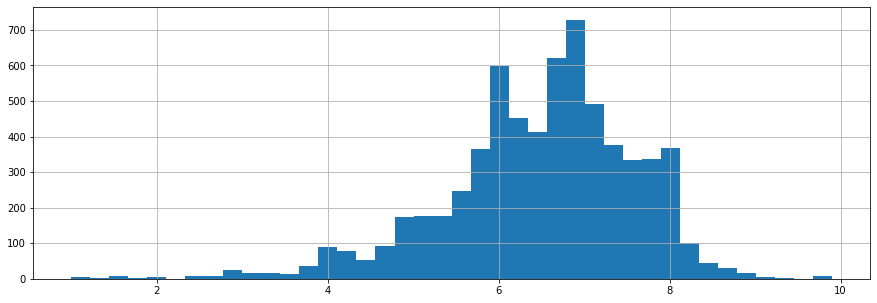

In [47]:
data['ratings'].hist(bins=40, figsize=(15, 5))
plt.show()

Значения в рамках 10 баллов, аномалий нет.

Приведем в порядок столбцы `refundable_support`, `nonrefundable_support`, `budget` и `box_office`. Прежде всего нужно понимать, что `budget` не может быть меньше, чем `refundable_support` или `nonrefundable_support`. Посмотрим, есть ли у нас аномалии:

In [48]:
data['budget'][data['budget'] <= data['refundable_support']]

2052    0
2057    0
2471    0
2531    0
2614    0
2683    0
2787    0
2873    0
3046    0
3564    0
3674    0
3738    0
5672    0
5805    0
6007    0
6322    0
6822    0
Name: budget, dtype: Int64

In [49]:
data['budget'][data['budget'] <= data['nonrefundable_support']].shape

(17,)

Мы нашли 17 строк, где `budget` равен нулю, при этом `refundable_support` или `nonrefundable_support` не нулевые. Нужно исправить это.

Один фильм может получить как возвратные, так и невозвратные средства, а иногда и то и другое. Значит семнадцать строк с нулевым бюджетом мы заполним суммой возвратных и невозвратных средств.

In [50]:
# починяем 
data.loc[(data['budget'] == 0 ) & (data['nonrefundable_support'] >= 0), 'budget'] = \
data['nonrefundable_support'] + data['refundable_support']

# проверяем 
data['budget'][data['budget'] <= (data['nonrefundable_support'] + data['refundable_support'])]

2052     23000000
2057     75000000
2471     80000000
2531     20000000
2614    160000000
2683     59000000
2787     35000000
2873      6000000
3046     70000000
3564    250000000
3674     40000000
3738     45000000
5672     60000000
5805     70000000
6007     80000000
6322    138969465
6822    180000000
Name: budget, dtype: Int64

А вот и наши семнадцать строк! - заполнились корректно. Теперь можно посмотреть на столбцы поближе, начнем с `refundable_support`:

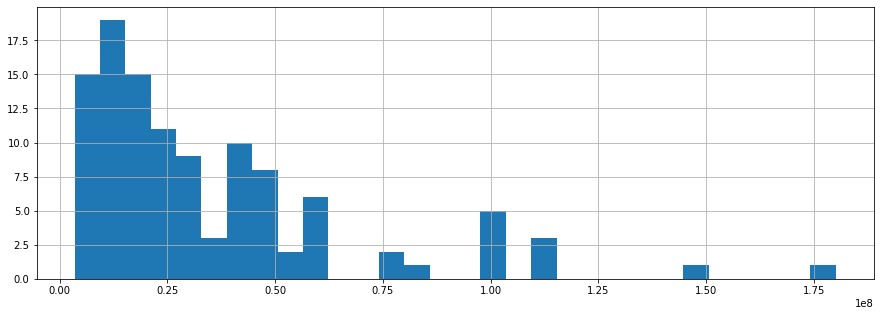

count    1.110000e+02
mean     3.548649e+07
std      3.197288e+07
min      3.500000e+06
25%      1.500000e+07
50%      2.500000e+07
75%      5.000000e+07
max      1.800000e+08
Name: refundable_support, dtype: float64

,title,director,refundable_support
7113,Тайна Печати Дракона,О. Степченко,180000000
3350,Дуэлянт,А. Мизгирев,150000000
6471,Три богатыря и наследница престола,К. Бронзит,115000000
3163,Герой (2015),Ю. Васильев,110000000
5436,Матильда,А. Учитель,110000000


In [51]:
# пропустим при построении нулевые значения
data['refundable_support'][data['refundable_support']>0].hist(bins=30, figsize=(15, 5))
plt.show()

# выведем числовое описание данных
display(data['refundable_support'][data['refundable_support']>0].describe())

# посмотрим на самых уверенных людей в отечественном кинематографе
data[['title','director','refundable_support']][data['refundable_support']>100000000] \
.sort_values(by='refundable_support', ascending=False)

In [52]:
# Код ревьюера

data[['title','director','refundable_support']][data['refundable_support']>100000000] \
    .sort_values(by='refundable_support', ascending=False)\
    .style.format({'refundable_support' : '{:,.0f}'})

,title,director,refundable_support
7113,Тайна Печати Дракона,О. Степченко,"180,000,000"
3350,Дуэлянт,А. Мизгирев,"150,000,000"
6471,Три богатыря и наследница престола,К. Бронзит,"115,000,000"
3163,Герой (2015),Ю. Васильев,"110,000,000"
5436,Матильда,А. Учитель,"110,000,000"


Медиана возвратных средств -  25 млн руб., именно на эту сумму стоит ориентироваться, при участии в спитчах о поддержке вашей киноленты (конечно же с возвратом). Отдельно хочу восхититься уверенностью режиссеров, которые рискнули взять `refundable_support` от 110 млн руб.

На очереди `nonrefundable_support`:

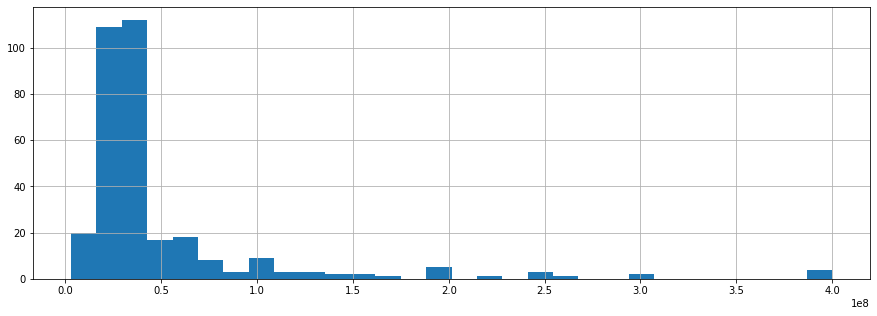

count    3.230000e+02
mean     5.034578e+07
std      6.024321e+07
min      3.000000e+06
25%      2.500000e+07
50%      3.000000e+07
75%      4.500000e+07
max      4.000000e+08
Name: nonrefundable_support, dtype: float64

,title,director,nonrefundable_support
7473,Вторжение,Ф. Бондарчук,400000000
7463,Союз спасения,А. Кравчук,400000000
5652,Движение вверх,А. Мегердичев,400000000
2919,Экипаж,Н. Лебедев,392104482
6886,Девятая,Н. Хомерики,300000000
3350,Дуэлянт,А. Мизгирев,300000000
5825,Тренер,Д. Козловский,260000000
3564,Притяжение (2016),Ф. Бондарчук,250000000
5568,Легенда о Коловрате,И. Шурховецкий,250000000
2698,Он - Дракон,И. Джендубаев,250000000


In [53]:
# пропустим при построении нулевые значения
data['nonrefundable_support'][data['nonrefundable_support']>0].hist(bins=30, figsize=(15, 5))
plt.show()

# выведем числовое описание данных
display(data['nonrefundable_support'][data['nonrefundable_support']>0].describe())

# посмотрим на самых красивых, умных и талантливых (а иначе за что столько денег?) людей в отечественном кинематографе
data[['title','director','nonrefundable_support']][data['nonrefundable_support']>100000000] \
.sort_values(by='nonrefundable_support', ascending=False)

Медиана невозвратных средств -  30 млн руб., но что происходит с максимумом `nonrefundable_support` - решительно не понимаю. Если в возвратных средствах я восхищался уверенностью режиссеров, то теперь я восхищаюсь количеством денег, которые выделяются на безвозмездной основе. Никогда бы не подумал, что Минкульт и Фонд Кино охотнее "раздают" деньги, чем "занимают". 

В среднем от государства можно получить 55 млн руб. на фильм, правда половину из средств поддержки придется вернуть.

Посмотрим на значения в `budget`:

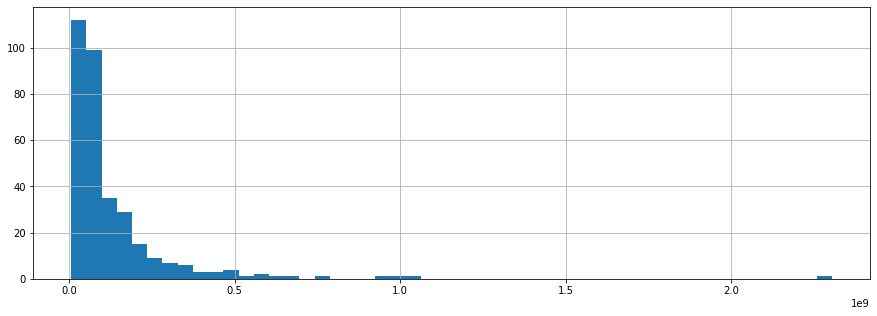

count    3.320000e+02
mean     1.314224e+08
std      1.871482e+08
min      6.000000e+06
25%      4.552480e+07
50%      7.119690e+07
75%      1.500000e+08
max      2.305074e+09
Name: budget, dtype: float64

,title,budget
7113,Тайна Печати Дракона,2305074303
5436,Матильда,1032905957
7463,Союз спасения,980000000
7473,Вторжение,944000000
7170,Грех,779941965
3350,Дуэлянт,684200536
2919,Экипаж,635283867
5652,Движение вверх,590192191
6548,Т-34,563784717
3254,Время первых (2017),528441977


In [54]:
# пропустим при построении нулевые значения
data['budget'][data['budget']>0].hist(bins=50, figsize=(15, 5))
plt.show()

# выведем числовое описание данных
display(data['budget'][data['budget']>0].describe())

# посмотрим на самые дорогие фильмы 
data[['title','budget']][data['budget']>500000000] \
.sort_values(by='budget', ascending=False)

Медианный бюджет - 71 млн руб., а фильмов с бюджетом более чем 500 млн руб. (назовем их крупнобюджетными) всего 11. Однако есть и пара невероятных бюджетов более *миллиарда (!)* руб. Надеюсь со сборами у них все в порядке...

И на десерт - `box_office`!

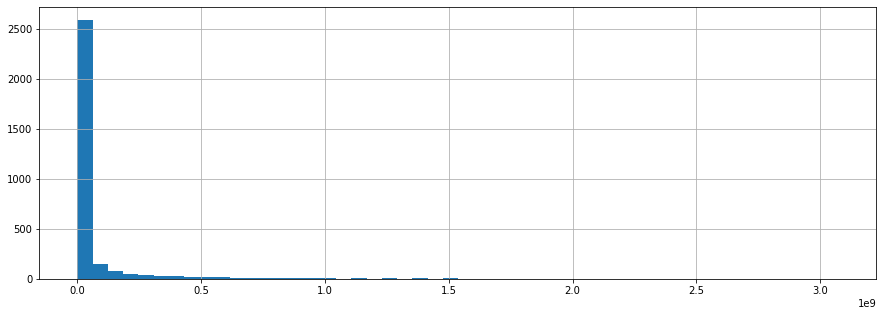

count    3.134000e+03
mean     7.706437e+07
std      2.411784e+08
min      4.000000e+01
25%      1.010288e+05
50%      2.409099e+06
75%      2.456979e+07
max      3.073569e+09
Name: box_office, dtype: float64

,title,box_office
7455,Холоп,3073568690
5652,Движение вверх,2779686144
6819,Мстители: Финал,2576613776
6548,Т-34,2271754004
3487,Пираты Карибского моря: Мертвецы не рассказыва...,2118396119


In [55]:
# пропустим при построении нулевые значения
data['box_office'][data['box_office']>0].hist(bins=50, figsize=(15, 5))
plt.show()

# выведем числовое описание данных
display(data['box_office'][data['box_office']>0].describe())

# посмотрим на самые дорогие фильмы 
data[['title','box_office']][data['box_office']>1000000000] \
.sort_values(by='box_office', ascending=False).head()

Минимальные сборы в десятки рублей? совсем не серьезно! Скорей всего имелось ввиду не 40 рублей а 40 миллионов рублей (это подтверждается при ручной проверке). Причиной этих ошибок могло послужить разные форматы заполнения значений. Обычно используется три формата: млн. руб., тыс. руб. и просто руб.

Вот что сделаем:

1. все сборы от 0 до 1000 мы помножим на миллион;
2. все сборы от 10000 до 95650 помножим на десять тысяч;
3. сборы больше 95650 трогать не будем, потому что как раз в этой категории появился первый мелкопрокатный фильм.

In [56]:
# правим,
data.loc[(data['box_office'] > 0) & 
         (data['box_office'] <= 1000), 'box_office'] *= 1000000
# и еще раз правим!
data.loc[(data['box_office'] > 1000) & 
         (data['box_office'] < 95650), 'box_office'] *= 10000
# проверяем результат
data['box_office'][data['box_office']>0].describe()

count    3.134000e+03
mean     1.435634e+08
std      2.817325e+08
min      9.565000e+04
25%      2.355474e+06
50%      1.834282e+07
75%      1.373893e+08
max      3.073569e+09
Name: box_office, dtype: float64

Ну вот теперь больше похоже на правду, при этом не сильно поменялась медиана и максимум остался прежним. Наверняка существуют еще строки, данные в которых следовало подкорректировать, но это уже только при ручном исправлении.

**Основная проблема количественных значений** - ошибки при вводе данных или намеренное их сокрытие.

In [57]:
# Код ревьюера

(data['box_office'] == 0).sum()

24

### Добавим новые столбцы

- Создадим столбец с информацией о годе проката. Выделим год из даты премьеры фильма.

In [58]:
# год проката
data['show_start_year'] = data['show_start_date'].dt.year

- Создадим два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

In [59]:
# столбец 'major_director'
data['major_director'] = data['director'].str.split(pat=',').str[0]

# столбец 'major_genre'
data['major_genre'] = data['genres'].str.split(pat=',').str[0]

In [60]:
#3 посмотрим как выглядят столбцы
data[['show_start_year','major_director','major_genre']].head()

,show_start_year,major_director,major_genre
0,2015,Кевин Костнер,Боевик
1,2016,Е. Матвеев,Драма
2,2016,Тимур Бекмамбетов,Фантастика
3,2016,Тимур Бекмамбетов,Фантастика
4,2015,Тимур Бекмамбетов,Фантастика


- Посчитаем, какую долю от общего бюджета фильма составляет государственная поддержка.

In [61]:
# общее описание
((data.loc[(data['budget'].notna()), 'nonrefundable_support'] + data['refundable_support']) /\
data['budget']*100).describe()

count    332.000000
mean      54.209799
std       19.692515
min        4.404305
25%       38.461538
50%       61.403763
75%       66.141160
max      100.000000
dtype: float64

In [62]:
# доля в процентах
((data.loc[(data['budget'].notna()), 'nonrefundable_support'] + data['refundable_support']) /\
data['budget']*100).describe()
# доля в процентах
((data.loc[(data['budget'].notna()), 'nonrefundable_support'] + data['refundable_support']) /\
data['budget']*100).value_counts().head()


100.000000    17
64.935065      6
66.666667      5
50.000000      5
65.789474      5
dtype: Int64

В среднем больше половины общего бюджета фильма составляет гос. поддержка, а чаще всего (в 17 случаях) это единственные средства.

**Подытожим:** данные были приведены в соответствие типу, изучены пропуски и причины их появления. Данные приведены в порядок и теперь они готовы к дальнейшей работе. Также были добавлены новые столбцы с данными.

## Проведем исследовательский анализ данных

- Посмотрим, сколько фильмов с известными данными о прокате в кинотеатрах выходило в прокат каждый год. Посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

In [63]:
# создадим отдельный датасет с данными, сгруппированными по годам
data_years = data.groupby('show_start_year').agg({'box_office': ['count', 'size', 'sum']}).reset_index()
data_years['ratio'] = data_years['box_office']['count'] / data_years['box_office']['size'] * 100

# посмотри на датафрейм
display(data_years)

# доля фильмов с указанной информацией о прокате
print('Общая доля фильмов с указанной информацией о прокате составляет: {:.1%}'
      .format(data['box_office'].notna().mean()))

show_start_year box_office                        ratio
                       count size          sum           
0            2010        105  985  21499240441  10.659898
1            2011        109  622  24246256535  17.524116
2            2012        128  593  28107376090  21.585160
3            2013        184  630  36192382886  29.206349
4            2014        279  806  46259288631  34.615385
5            2015        465  705  57174325704  65.957447
6            2016        526  818  73482440795  64.303178
7            2017        357  505  52516531892  70.693069
8            2018        475  891  53649434806  53.310887
9            2019        530  930  56800491030  56.989247

Общая доля фильмов с указанной информацией о прокате составляет: 42.2%


- Изучим, как менялась динамика проката по годам.

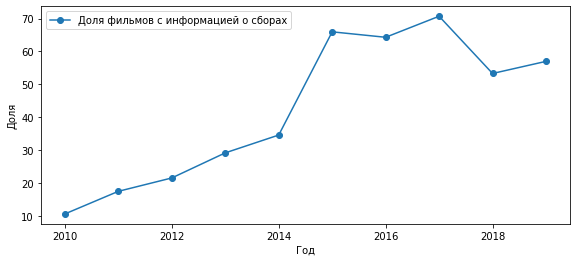

In [64]:
# построим график
data_years.plot(x='show_start_year', y='ratio', style='-o', label='Доля фильмов с информацией о сборах')
plt.xlabel('Год')
plt.ylabel('Доля')
plt.subplots_adjust(right=1.35)
plt.show()

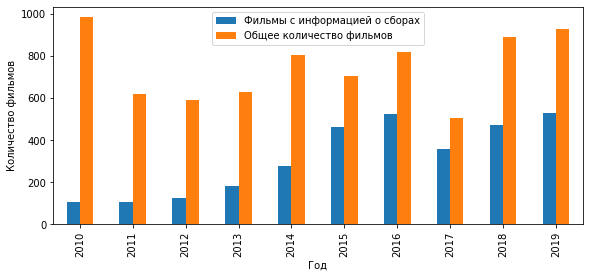

In [65]:
# построим гистограмму
data_years.plot.bar(x='show_start_year', y=[('box_office','count'),('box_office','size')],  
                  label=['Фильмы с информацией о сборах', 'Общее количество фильмов'])
plt.xlabel('Год')
plt.ylabel('Количество фильмов')
plt.subplots_adjust(right=1.35)
plt.show()

**42.2%** фильмов указали свои сборы.
С каждым годом фильмы охотнее делились информацией о сборах (вплоть до 70% от общего числа картин), однако в 2017 году (возможно связано с [правками](http://www.consultant.ru/document/cons_doc_LAW_221186/ "Консультант плюс") о послаблении для прокатных удостоверений).

Наиболее полные данные представлены в период 2015-2017 годов (**64.3% - 70.7%**).

- Изучим, как менялась динамика проката по годам.

Выведем на экран ранее созданную таблицу `data_years`, подсветим максимальное и минимальное значение суммы прокатных сборов, построим график, отражающий динамику суммы сборов по годам.

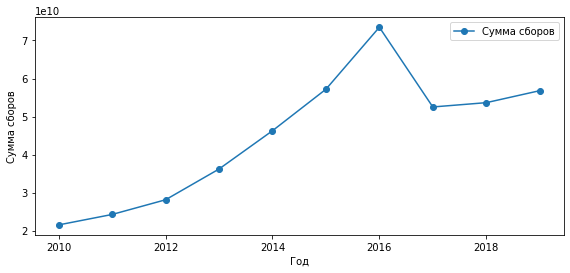

In [66]:
# выведем датафрейм на экран, подсветим максимальные и минимальные значения для сборов
display(data_years.style.format('{:.0f}')
        .highlight_max(color='lightgreen', subset=[('box_office','sum')])
        .highlight_min(color='#ff6933', subset=[('box_office','sum')]))

# построим график
data_years.plot(x='show_start_year', y=('box_office','sum'), style='-o', label='Сумма сборов')
plt.xlabel('Год')
plt.ylabel('Сумма сборов')
plt.subplots_adjust(right=1.35)
plt.show()

Пик приходится на 2016, предлагаю посмотреть на топ 5 лидеров сборов за этот год:

In [67]:
# посмотрим на топ 5 за 2016 год
data.loc[data['show_start_year'] == 2016,
       ['title','type','ratings','age_restriction','major_genre','box_office']] \
.sort_values('box_office', ascending=False).head()

,title,type,ratings,age_restriction,major_genre,box_office
2858,Зверополис,Анимационный,8.3,6,Комедия,2048126108
3754,Тайная жизнь домашних животных. Миньоны против...,Анимационный,6.7,6,Комедия,1971005085
2839,Дэдпул,Художественный,7.5,18,Фантастика,1587516389
3395,Отряд самоубийц,Художественный,6.1,16,Фантастика,1570380294
2919,Экипаж,Художественный,7.6,6,Драма,1402255390


2016 год астрологи объявили годом анимационных лент для детей - сборы в прокате составят два млрд руб.

Так же в этом году набирают обороты фильмы по комиксам,  сборы которых перевалили за полтора млрд руб., кстати год примечателен выходом Дэдпула - он стал самым кассовым среди всех фильмов с рейтингом 18 в истории.

Пятерку лидеров занимает отечественный блокбастер 2016 года - "Экипаж". Сборы составили почти полтора млрд руб.

- С помощью сводной таблицы посчитаем среднюю и медианную сумму сборов для каждого года.

In [68]:
# выведем на экран сводную таблицу со средними и медианными значениями сумм сбора по годам
display(data.pivot_table(index='show_start_year', values='box_office', aggfunc=['mean','median']) \
.sort_values(by=('mean', 'box_office'),ascending=False).style.format('{:.0f}')
        .highlight_max(color='lightgreen')
        .highlight_min(color='#ff6933'))

,mean,median
,box_office,box_office
show_start_year,,
2011,222442721,92700000
2012,219588876,122970000
2010,204754671,120000000
2013,196697733,76350000
2014,165803902,42950000
2017,147105131,11031012
2016,139700458,11957194
2015,122955539,14152495


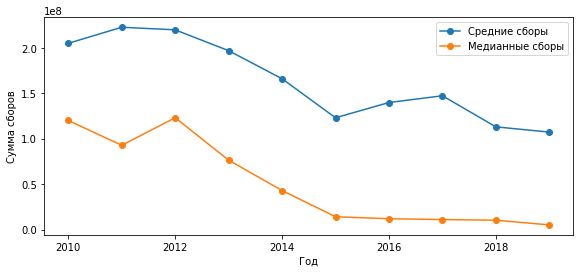

In [69]:
# построим график 
data.pivot_table(index='show_start_year', values='box_office', aggfunc=['mean','median']) \
.sort_values(by='show_start_year').plot(style='-o')

plt.xlabel('Год')
plt.ylabel('Сумма сборов')
plt.legend(['Средние сборы', 'Медианные сборы'])
plt.subplots_adjust(right=1.35)
plt.show()

На графике видно, что начиная с 2012 года (за небольшим исключением) сборы неуклонно падают. Моя гипотеза заключается в том, что кинотеатры потихоньку начинают сдавать позиции под [натиском стриминг-платформ](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D0%B6%D0%B4%D1%83%D0%BD%D0%B0%D1%80%D0%BE%D0%B4%D0%BD%D0%B0%D1%8F_%D1%8D%D0%BA%D1%81%D0%BF%D0%B0%D0%BD%D1%81%D0%B8%D1%8F_Netflix "Вики"). К сожалению в исходном датасете нет информации по типу прокатного удостоверения, и проверить какие выдавались для проката на киноэкранах, а какие для стриминга - проблематично.

- Определим, влияет ли возрастное ограничение на сборы фильма в прокате в период с 2015 по 2019 год.

In [70]:
# посмотрим на сборы по возрастным ограничениям
data.pivot_table(index=data.loc[data['show_start_year'] >= 2015, 'show_start_year'], \
columns='age_restriction', values='box_office', aggfunc='sum').sort_values(by='show_start_year') \
.style.format('{:.0f}').highlight_max(color='lightgreen').highlight_min(color='#ff6933')

age_restriction,0,6,12,16,18
show_start_year,,,,,
2015.0,1565807662,11332498139,18161327419,17491073318,8623619166
2016.0,3905091830,17353731325,16547022202,25727761783,9948833655
2017.0,229598930,12086142145,9468295956,18745042899,11987451962
2018.0,32449001,10104974592,15891249224,17328579778,10292182211
2019.0,827665066,13246409228,14341282618,16623601870,11761532248


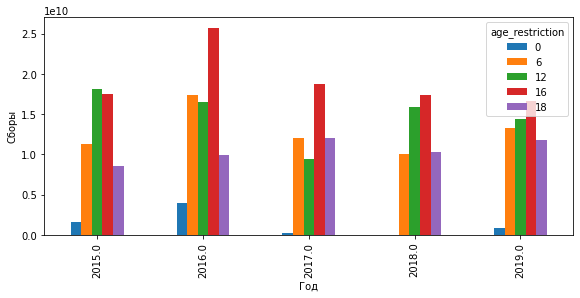

In [71]:
# выведем по этой таблице гистограмму
data.pivot_table(index=data.loc[data['show_start_year'] >= 2015, 'show_start_year'], \
columns='age_restriction', values='box_office', aggfunc='sum').sort_values(by='show_start_year').plot.bar()
plt.xlabel('Год')
plt.ylabel('Сборы')
plt.subplots_adjust(right=1.35)
plt.show()

In [72]:
# посмотрим на сборы по возрастным ограничениям
data.pivot_table(index=data.loc[data['show_start_year'] >= 2015, 'show_start_year'], \
columns='age_restriction', values='box_office', aggfunc='median').sort_values(by='show_start_year') \
.style.format('{:.0f}').highlight_max(color='lightgreen').highlight_min(color='#ff6933')

age_restriction,0,6,12,16,18
show_start_year,,,,,
2015.0,4084228,57395723,69000000,11589824,6809921
2016.0,3640802,26758888,21700594,14702562,10113896
2017.0,22178956,51992103,30156174,9702077,9876765
2018.0,3616937,14688850,11690948,9449272,8637197
2019.0,13779632,16277926,4012546,4181658,5901733


In [73]:
# Код ревьюера

data.pivot_table(index=data.loc[data['show_start_year'] >= 2015, 'show_start_year'], \
    columns='age_restriction', values='box_office', aggfunc='median').sort_values(by='show_start_year') \
    .style.format('{:.0f}').highlight_max(color='lightgreen', axis=1).highlight_min(color='#ff6933',axis=1)

age_restriction,0,6,12,16,18
show_start_year,,,,,
2015.0,4084228,57395723,69000000,11589824,6809921
2016.0,3640802,26758888,21700594,14702562,10113896
2017.0,22178956,51992103,30156174,9702077,9876765
2018.0,3616937,14688850,11690948,9449272,8637197
2019.0,13779632,16277926,4012546,4181658,5901733


Самая прибыльная категория фильмов - **16+**. На втором месте - семейный рейтинг **12+** и **6+**. Меньше всего кассовых сборов - **0+**.

Киношники явно стараются попасть в самые *богатенькие* категории (знают где денежка водится): фильмы с рейтингом 12+ и 6+ сгоняют на сеансы в кинотеатры не только детей, но и их родителей. А вот пубертатный рейтинг 16+ хоть и требует сопровождения родителей, но все более-менее прилично, то в случае с 18+ фильмом можно и от стыда сгореть перед родителем. 

Посмотрим на самый прибыльный жанр:

In [74]:
pd.DataFrame(data.groupby('major_genre')['box_office'].agg('sum').sort_values(ascending=False)).head()

,box_office
major_genre,
Фантастика,69289242680
Драма,67337130154
Комедия,66958692929
Фэнтези,56070211311
Боевик,43603141410


Чтобы сорвать кассу - нужно снять **инопланетное вторжение в брокилон, где Терри Крюс теряет свою любовь**.

Ориентировочно заработаем 303 млрд руб.

In [75]:
pd.DataFrame(data.groupby('major_genre')['box_office'].agg('median').sort_values(ascending=False)).head() \
.style.format('{:.0f}').highlight_max(color='lightgreen').highlight_min(color='#ff6933')

,box_office
major_genre,
Спорт,86086226
Фантастика,79519775
Фэнтези,57395723
Мюзикл,53293832
Детектив,51768404


## Исследуем фильмы, которые получили государственную поддержку

Cоздадим датафрейм `data_support`, в который поместим записи с фильмами с гос. поддержкой (`refundable_support` + `nonrefundable_support`).

In [76]:
# создадим вспомогательный столбец
data['governmental_support'] = data['refundable_support'] + data['nonrefundable_support']

# создадим таблицу с фильмами, которые финансировались государством
data_support = data.loc[data['governmental_support'] > 0, 
                    ['title', 'puNumber', 'type', 'film_studio', 'production_country', 'age_restriction', 'ratings',
                     'show_start_year', 'producer',  'major_director', 'major_genre',
                     'financing_source', 'budget', 'box_office', 'governmental_support']]

# посчитаем количество фильмов с гос. поддержкой
data_support['title'].count()

332

Всего 332 картины были профинансированы государством. Посмотрим на связи господдержки и других столбцов.

### Общие объёмы государственного финансирования

Взглянем на общую сумма господдержки.

In [77]:
# посчитаем общую сумму господдержки
data_support['governmental_support'].sum()

20200688312

За все время Минкульт и Фонд Кино выделили свыше **20.2 млрд руб.** Сумма не вызывает трепет, если учитывать, что это "размазано"  на 332 фильма. Однако грустно от понимания что это деньги налогоплательщиков, и далеко не всем по нраву придется такое расходование бюджетных средств.

### Распределение государственной поддержки по годам

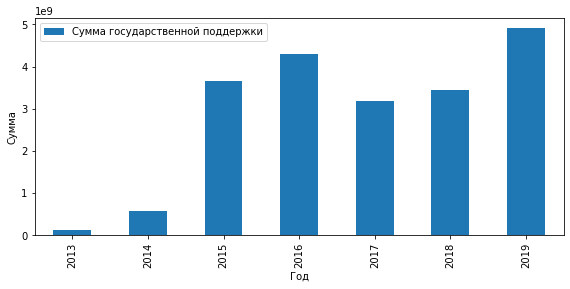

count    3.320000e+02
mean     6.084545e+07
std      7.275546e+07
min      3.000000e+06
25%      2.533375e+07
50%      3.500000e+07
75%      6.000000e+07
max      5.000000e+08
Name: governmental_support, dtype: float64

In [78]:
# построим гистограмму распределения финансирования по годам
data_support.pivot_table(index='show_start_year', values=['governmental_support'], aggfunc='sum') \
.plot.bar(y='governmental_support', label='Сумма государственной поддержки')
plt.xlabel('Год')
plt.ylabel('Сумма')
plt.subplots_adjust(right=1.35)
plt.show()

data_support['governmental_support'].describe()

Господдержка появилась в 2013 и первые два года была меньше одного млрд руб. И только с 2015 года превысила отметку в 3 млрд руб. Самый спонсируемый год - 2019: фильмам раздали **5 млрд руб.**

### Окупаемость фильмов, получивших государственное финансирование

Сравним графики сборов и господдержки по годам.

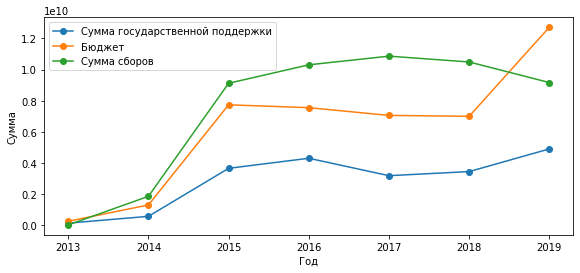

In [79]:
data_support.groupby('show_start_year').agg({'governmental_support': 'sum','budget': 'sum', 'box_office': 'sum'}) \
    .plot(style='-o')
plt.xlabel('Год')
plt.ylabel('Сумма')
plt.legend(['Сумма государственной поддержки','Бюджет', 'Сумма сборов'])
plt.subplots_adjust(right=1.35)
plt.show()

Все года, кроме пилотного 2013, показывают, что вложенные государством в кинопроекты деньги, окупались. 

Перейдем к частности - к фильмам. Проверим, какие окупились с запасом, а какие провалились в прокате.

In [80]:
# добавим столбец с отношением сборов к господдержке
data_support['profit_procent'] = data_support['box_office'] / data_support['governmental_support'] * 100

# посмотрим сколько фильмов не отбились в прокате
display(data_support['profit_procent'][data_support['profit_procent']<100].count())

data_support['profit_procent'].describe()

179

count     318.000000
mean      287.290388
std       572.588149
min         0.240067
25%         7.611503
50%        59.240799
75%       254.021704
max      5122.614483
Name: profit_procent, dtype: float64

Выглядит так, что половине фильмов не удалось отбить средства в прокате. Посмотрим на 5 фильмов, где господдержка отбилась с запасом:

In [81]:
data_support[['title', 'major_genre', 'ratings', 'box_office', 'governmental_support', 'profit_procent']] \
        .sort_values(by='profit_procent', ascending=False).head()

,title,major_genre,ratings,box_office,governmental_support,profit_procent
7455,Холоп,Комедия,6.8,3073568690,60000000,5122.614483
3060,Первая Мировая война WWI,Нет данных,NaN,878100000,30000000,2927.0
6909,ВЕСУРИ,Нет данных,NaN,758500000,30000000,2528.333333
2488,Последний вагон. Весна,Триллер,5.1,611930000,25000000,2447.72
2981,Сдается дом со всеми неудобствами,Комедия,5.8,558000000,23500000,2374.468085


Теперь посмотрим на фильмы, где господдержка не помогла:

In [82]:
data_support[['title', 'major_genre', 'ratings', 'box_office', 'governmental_support', 'profit_procent']] \
        .sort_values(by='profit_procent').head(5)

,title,major_genre,ratings,box_office,governmental_support,profit_procent
2536,ВСТАВАЙ И БЕЙСЯ,Драма,6.4,144040,60000000,0.240067
3654,О чем молчат французы,Нет данных,NaN,95650,30000000,0.318833
3007,Инсайт (2015),Драма,6.4,100805,29000000,0.347603
3202,Подлец,Комедия,5.2,130053,24986000,0.520503
2450,ПРАЗДНИК НЕПОСЛУШАНИЯ,Нет данных,NaN,182510,34000000,0.536794


Сборы фильмов явно не соответствуют действительности, мои правки `box_office` до сюда явно не дошли. 

К сожалению, по этой категории **корректные результаты, без ручного исправления данных, не получить.**

### Зависимость финансовых показателей от рейтинга фильма

Построим три графика зависимости `box_office`, `budget` и `profit_procent` от `ratings`.

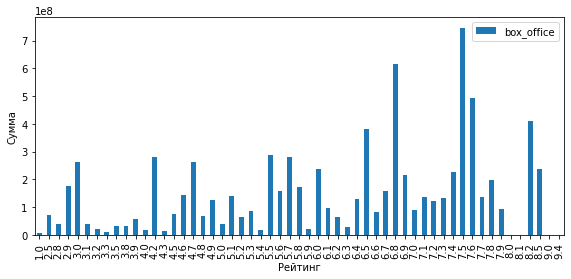

In [83]:
# зависимость рейтинга от сборов
data_support.pivot_table(index='ratings', values=['box_office']).plot(kind='bar')
plt.xlabel('Рейтинг')
plt.ylabel('Сумма')
plt.subplots_adjust(right=1.35)
plt.show()

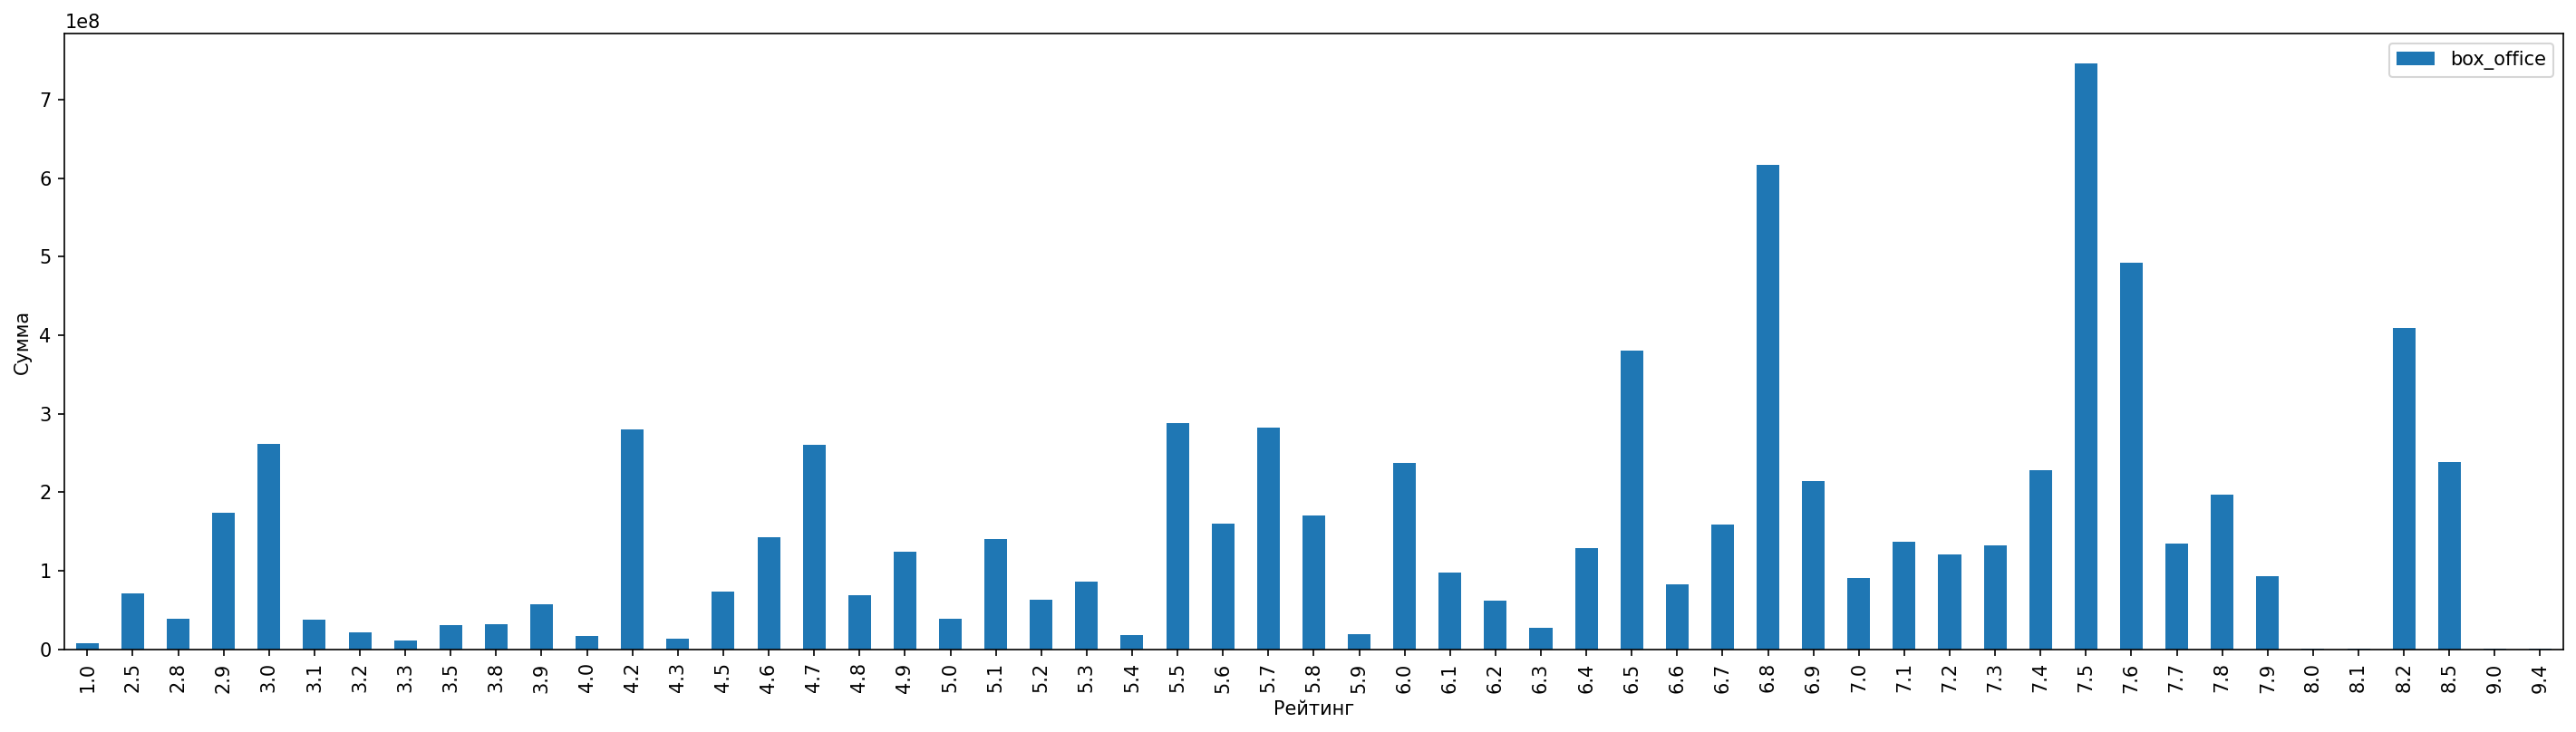

In [84]:
# Код ревьюера

fig, ax = plt.subplots(figsize=(15,6), dpi=150)

# зависимость рейтинга от сборов
data_support.pivot_table(index='ratings', values=['box_office']).plot(kind='bar', ax=ax)
plt.xlabel('Рейтинг')
plt.ylabel('Сумма')
plt.subplots_adjust(right=1.35)
plt.show()

<AxesSubplot:xlabel='ratings'>

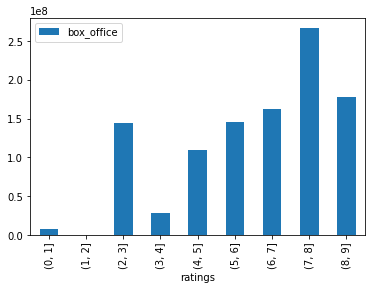

In [85]:
# код ревьюера

data_support.groupby(pd.cut(data_support['ratings'], bins=np.arange(0,10,1))).agg({'box_office' : 'mean'}).plot(kind='bar')

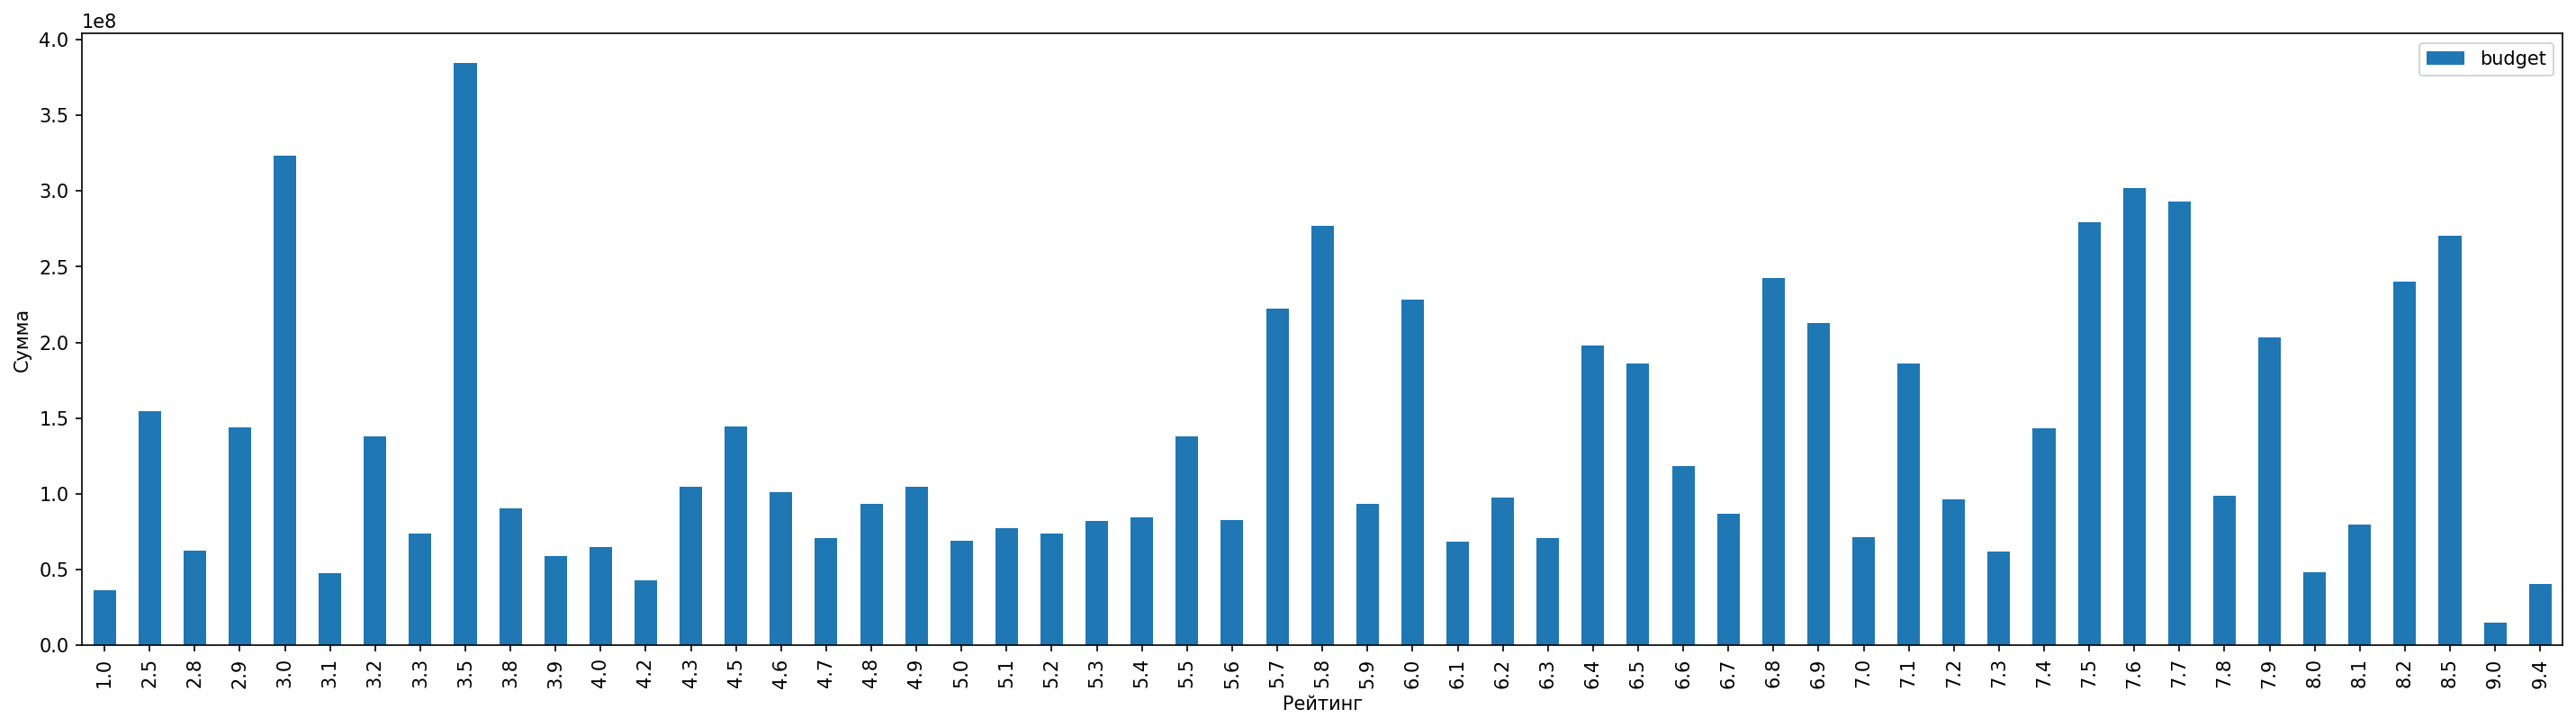

In [86]:
# зависимость рейтинга от бюджета 
fig, ax = plt.subplots(figsize=(15,6), dpi=150)
data_support.pivot_table(index='ratings', values=['budget']).plot(kind='bar', ax=ax)
plt.xlabel('Рейтинг')
plt.ylabel('Сумма')
plt.subplots_adjust(right=1.35)
plt.show()

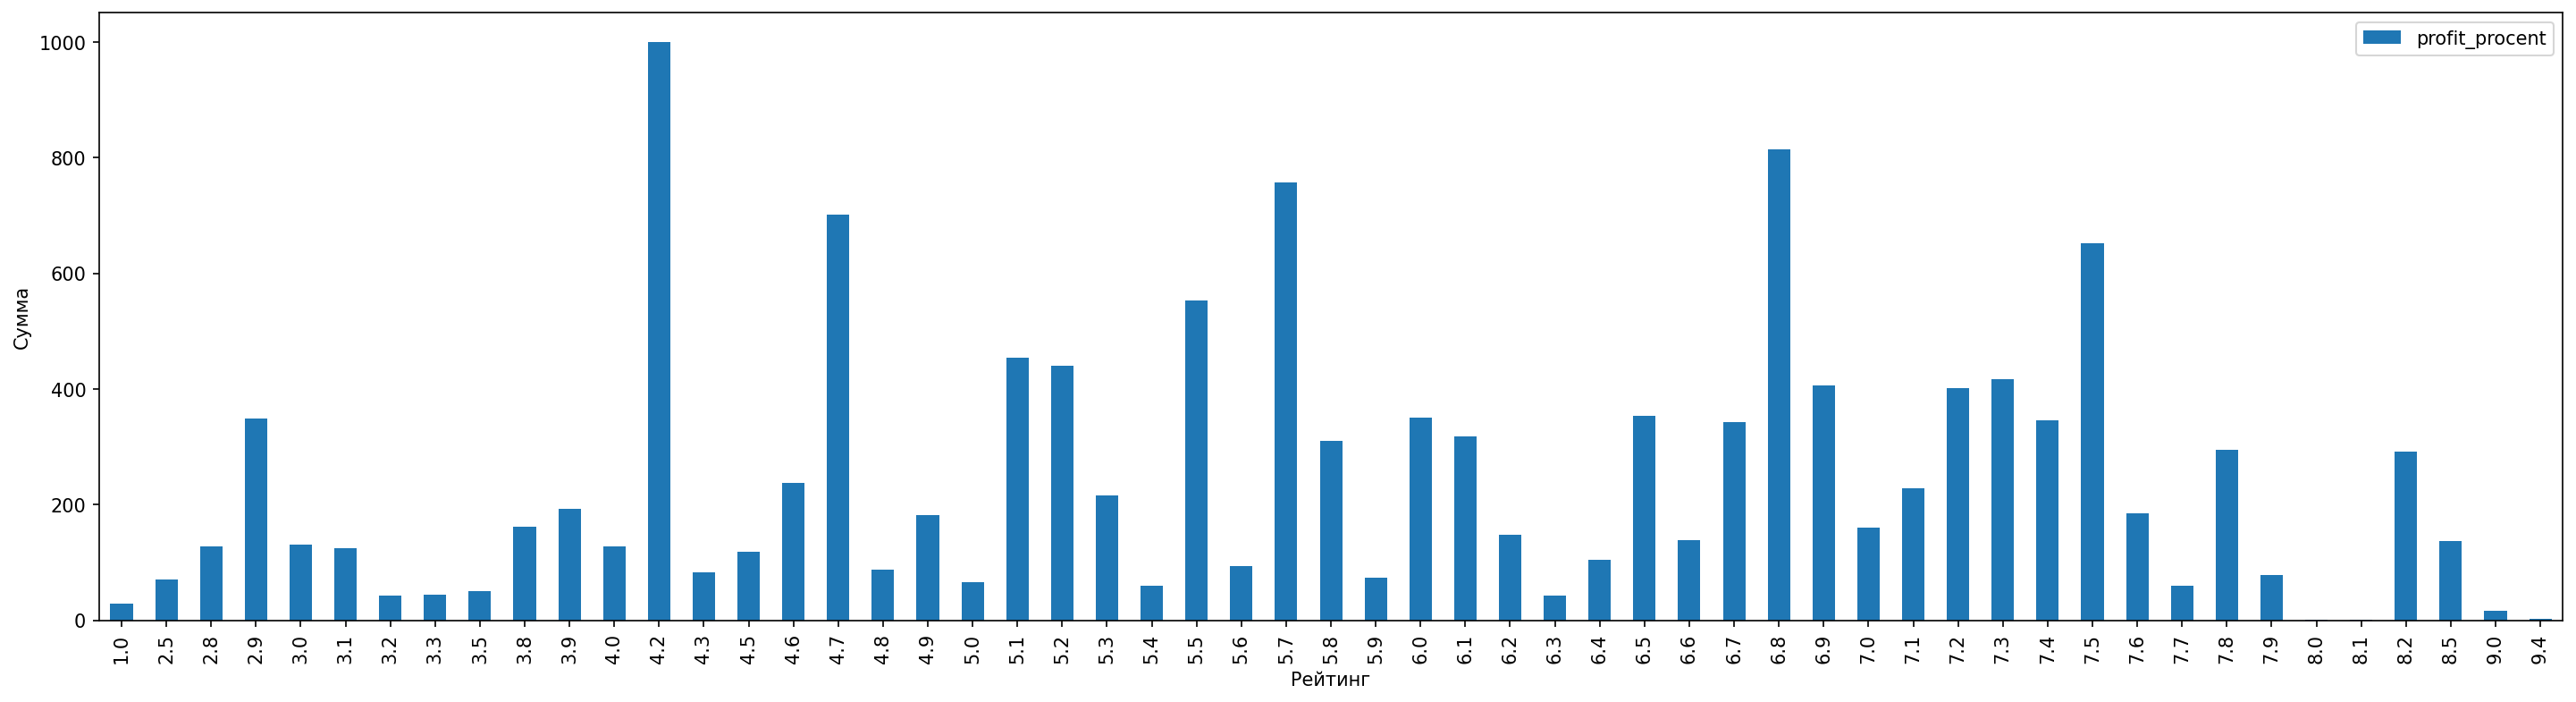

In [87]:
# зависимость рейтинга от отношения сборов к господдержке
fig, ax = plt.subplots(figsize=(15,6), dpi=150)
data_support.pivot_table(index='ratings', values=['profit_procent']).plot(kind='bar', ax=ax)
plt.xlabel('Рейтинг')
plt.ylabel('Сумма')
plt.subplots_adjust(right=1.35)
plt.show()

Графики выглядят как старая деревенская плетень - зависимостей нет никаких. 

**Рейтинг - величина, никак не влияющая на финансовую сторону фильма**.

### Изучим фильмы с самой большой государственной поддержкой

Выведем пятёрку фильмов с самой большой государственной поддержкой, а также продюсеров, которым государство выделило больше всего средств.

In [88]:
# ТОП-5 фильмов с государственной поддержкой
display(data_support[['title', 'major_director', 'major_genre', 'ratings', \
                      'film_studio','box_office', 'governmental_support', 'profit_procent']]
.sort_values(by='governmental_support', ascending=False).head())

,title,major_director,major_genre,ratings,film_studio,box_office,governmental_support,profit_procent
7473,Вторжение,Ф. Бондарчук,Фантастика,5.7,"Арт Пикчерс , Водород 2011",<NA>,500000000,<NA>
7463,Союз спасения,А. Кравчук,История,6.0,Здирекция Кино,717703185,500000000,143.540637
3350,Дуэлянт,А. Мизгирев,Драма,6.6,Нон-Стоп,364285139,450000000,80.952253
2919,Экипаж,Н. Лебедев,Драма,7.6,Тритэ Никиты Михалкова,1402255390,442104482,317.177375
5652,Движение вверх,А. Мегердичев,Спорт,7.5,Тритэ Никиты Михалкова,2779686144,400000000,694.921536


Максимальная помощь составила **500 млн. руб.**, сумма очень немаленькая. При этом ничего нельзя сказать о "Вторжении" Бондарчука, ведь данных о сборах нет.

А вот что можно сказать с уверенностью, так это то, что даже с невероятными **450 млн. руб.** фильм "Дуэлянт" Мизгирева - провалился.

##  Общий вывод

Целью нашего исследования является изучение рынка российского кинопроката. Отдельно требовалось изучить фильмы, которые получили господдержку.

В результате проделанной работы, данные были приведены в соответствие их типу, изучены пропуски, причины их появления, по возможности, пропущенные значения были заменены на достоверные. Однако **в неторорых случаях корректные результаты, без ручного исправления данных, не получить.**

Исследование данных показало, что резкий рост сборов с 2015 года состоялся благодаря нескольким отдельным фильмам. 

Анализ данных по возрастным категориям выявил самую доходную категорию фильмов это **'16+'**. 
Также мы выяснили, что самые "кассовые" жанры это **фантастика** и **драма**.

Выяснили, что господдержку получило всего 332 фильма с общей суммой финансирования в **20,200,688,312 руб.**, и из года в год господдержка только растет (за небольшим исключением в 2017-2018 годах). 

Выяснили, что **рейтинг не влияет** на финансовые показатели киноленты.

Из особенностей можно отметить, что вложенные государством средства полностью окупаются в российском кинопоркате. 
Однако, около **54%** фильмов не окупаются. Главный жанр фильмов, получивших господдержку - **драмы**.

Для более точного анализа данных необходимо получить больше информации о сборах и господдержке, а также провести ревизию на предмет корректности заполнения данных.